In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

def load_df(filename):
    with open(f'/home/rth/Code/private/master-thesis/community-detection-benchmark/output/{filename}.json') as f:
        data = json.load(f)
    return data

def mk_df(data):
    return pd.DataFrame(data['result'])

def filter_bad_seeds(data):
    # filter out when at least on seed is equall 0 - means seeds count is broken...
    old_cnt = len(data['result'])
    
    
    new_result = [x for x in data['result'] if all(y != 0 for y in x['realSeedCommunitySizes'])]
    new_data = {**data, 'result': new_result }
    
    new_cnt = len(new_data['result'])
    print(f'removed rows: {old_cnt - new_cnt}/{old_cnt}')
    
    return new_data

def print_plots(df, data, param):
    for g in ['karate', 'dolphins', 'football', 'polbooks']:
        
        fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
        main_title = g.upper()
        fig.suptitle(main_title, fontsize=16)
        
        for i, alg in enumerate(['fastGreedy', 'louvain', 'edgeBetweenness']):
            baseline = next(x for x in data['baseline'] if x['graph'] == g and x['algorithm'] == alg)[param]
            
            curr = df[(df['graph'] == g) & (df['algorithm'] == alg+'Seed')]
            
            alg_title = alg[:1].upper() + alg[1:] + 'Seed'
            axes[0, i].set_title(f'{alg_title}\n(NMI baseline: {baseline})')
            
            for (j, structure) in enumerate(['RANDOM', 'CONNECTED']):
                df_plot = curr[curr['seedStructureParam'] == structure].reset_index(drop=True)
                df_plot['index'] = df_plot.index.values
#                 print(df_plot)
#             
                # moments when seedSize param changes
                seed_size_max_idxs = list(df_plot[df_plot['seedSizeParam'] == 0.5].index)
                
#                 title = f"{alg} ({structure})"
#                 (baseline NMI: {baseline})
#                 title = alg
                color = 'blue' if j == 0 else 'green'
#                 pl = df_plot.plot(y=param, ax=axes[j, i], title=title, color=color)

                pl = df_plot.plot(y=param, x='index', kind='line', ax=axes[j, i], color=color, style='.-')
        
                pl.axhline(baseline, color="red", linestyle="--")
                    
                for x in seed_size_max_idxs:
                    pl.axvline(x=x+0.5, color="gray", linestyle="--", linewidth=0.5)
                    
                axes[j, 0].set_ylabel(structure, size='large')

# def print_subplots(df, data, param):
#     for g in ['karate', 'dolphins', 'football', 'polbooks']:
#         fig, (ax1, ax2, ax2) = plt.subplots(1, 2)
#         for alg in ['fastGreedy', 'louvain', 'edgeBetweenness']:
#             baseline = next(x for x in data['baseline'] if x['graph'] == g and x['algorithm'] == alg)[param]
#             title = f">>> {g}: {alg} (baseline NMI: {baseline})"
            
#             curr = df[(df['graph'] == g) & (df['algorithm'] == alg+'Seed')].reset_index(drop=True)
#             curr.plot(y=param, title=title)\
#                 .axhline(baseline, color="red", linestyle="--")
            
# #     fig, (ax1, ax2) = plt.subplots(1, 2)
            

removed rows: 173/2280


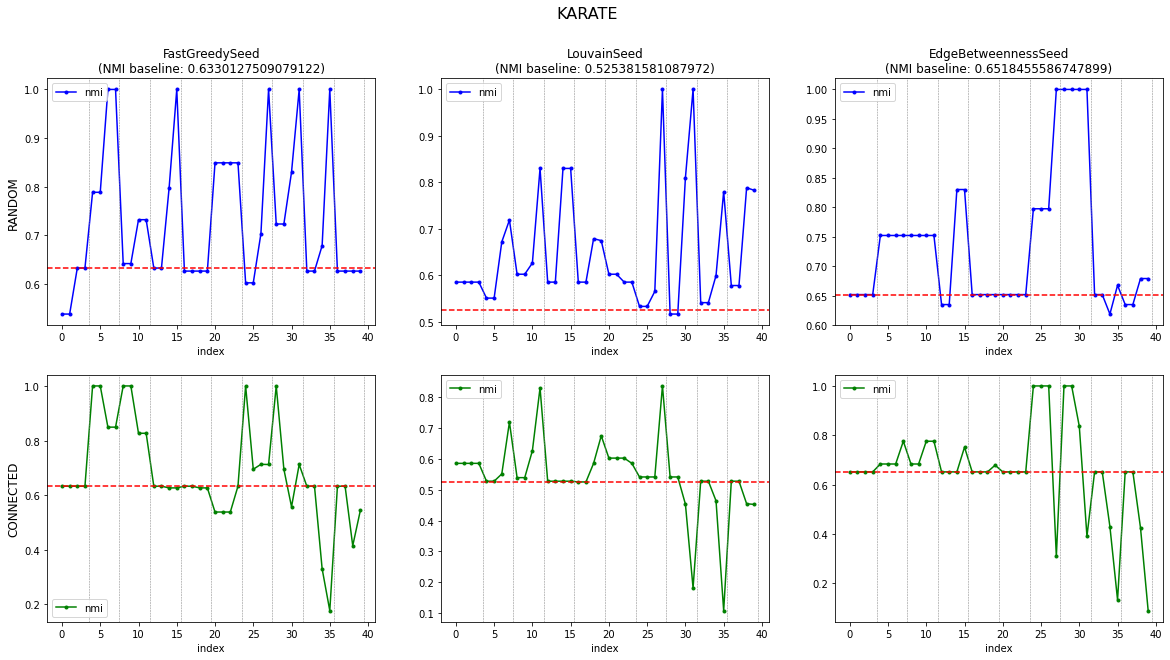

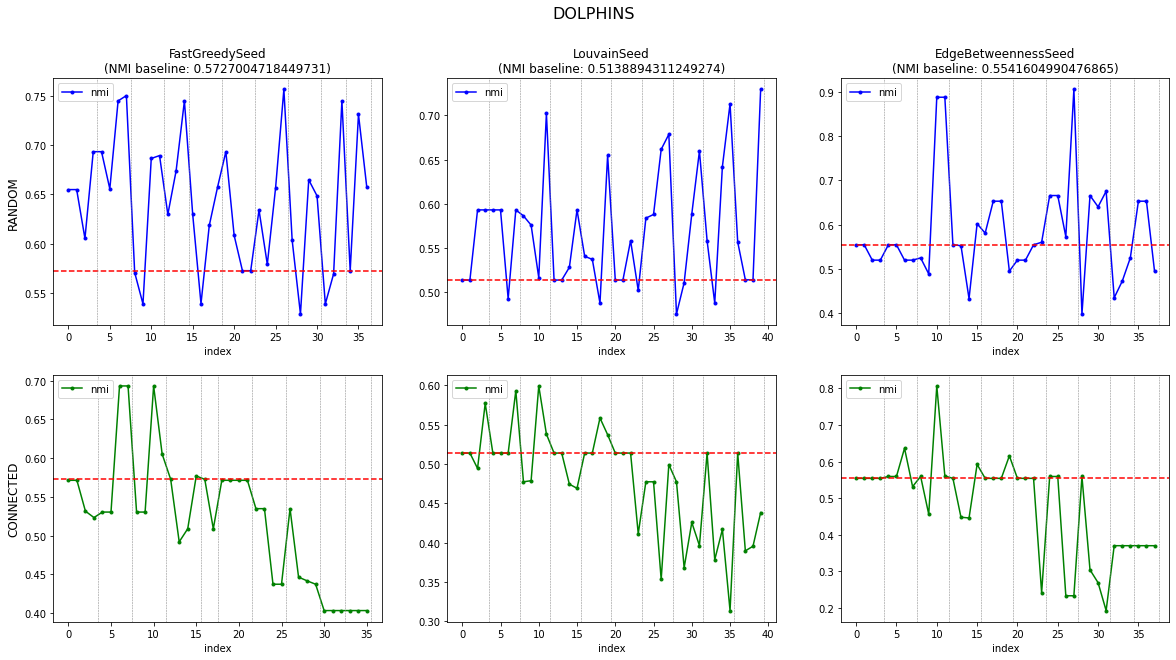

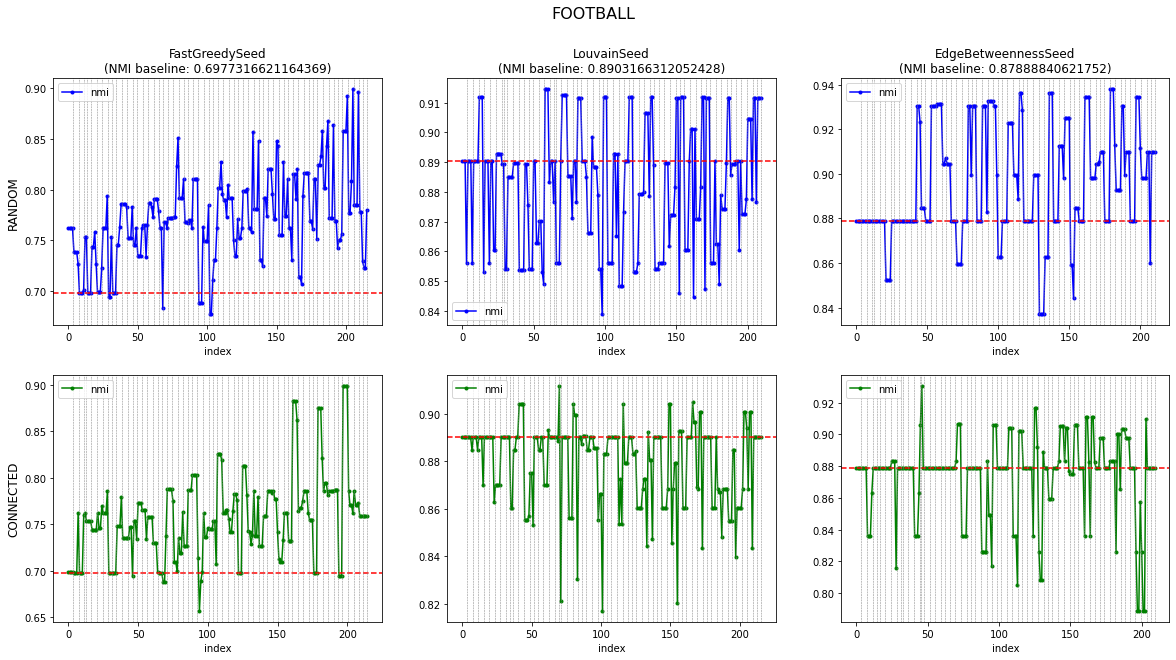

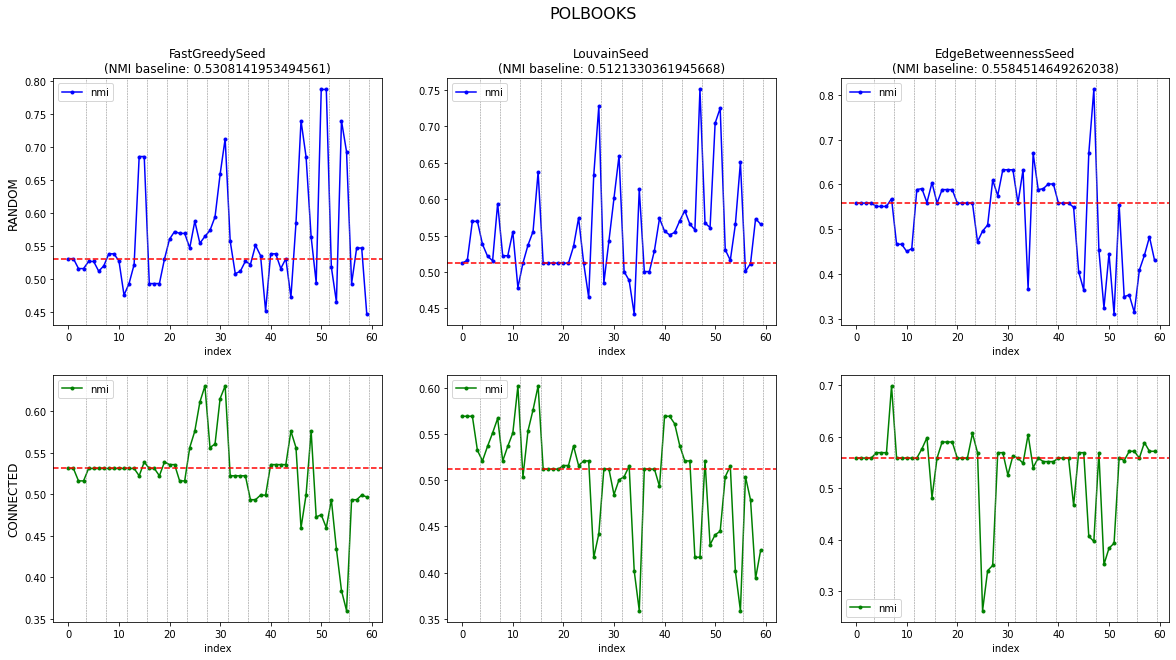

In [147]:
filename = 'benchmark-2020-08-23T14:48:15.551Z'
data= load_df(filename)
df = mk_df(filter_bad_seeds(data))
print_plots(df, data,  'nmi')

In [ ]:
filename = 'benchmark-2020-08-21T09:46:27.363Z'
data= load_df(filename)
df = mk_df(data)
print_plots(df, data,  'nmi')